#  **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  **Problem Statement**

**Predict the MPG of a car given its characteristics using a linear regression model. Linear regression will help us understand the relationship between the independent variables (e.g., weight, horsepower) and the dependent variable (MPG).**

# **Loading the DataSet**

In [2]:
df = pd.read_csv('car-mpg.csv')

# **Reading the dataset**

In [3]:
df.head(3)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


# **Defining Target variable and Problem type**

**Target variable(y) =  mpg**

**mpg** is continuous numeric column, so it is **Regression problem**.

# **Shape of the dataset**

In [4]:
print('Dataset contains',df.shape[0],'rows and', df.shape[1],'columns')

Dataset contains 398 rows and 9 columns


# **Info/Datatype/Null values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- The datatype of the **HP** column is incorrect; it should be **int**.
- No missing values present in the dataset.

# **Checking column names**

In [6]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

- The column names are correct.

# **Correcting Datatype**

In [7]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df['hp'] = df.hp.replace('?',np.nan)

In [9]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df['hp'] = df['hp'].astype(float)

# **Checking datatype corrected or not**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


- Datatype corrected now.

# **5 Point summary**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [13]:
df.describe(include = 'object').T

,count,unique,top,freq
car_name,398,305,ford pinto,6


# **Descripency Check**

In [14]:
df.car_name.value_counts()

car_name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

# **Null Value check**

In [15]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

 ### Observation:
- Only `hp` has missing values. Rows with missing values will be dropped to avoid data leakage.

# **Dropping missing values**

In [16]:
df = df.dropna()

# **Null Value Check After Treatment**

In [17]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

- Null values are dropped.

# **Check duplicate values**

In [18]:
df.duplicated().sum()

0

- No duplicate values present

# **Univariate Analysis**

In [19]:
cont_col = df.select_dtypes(include = 'number')

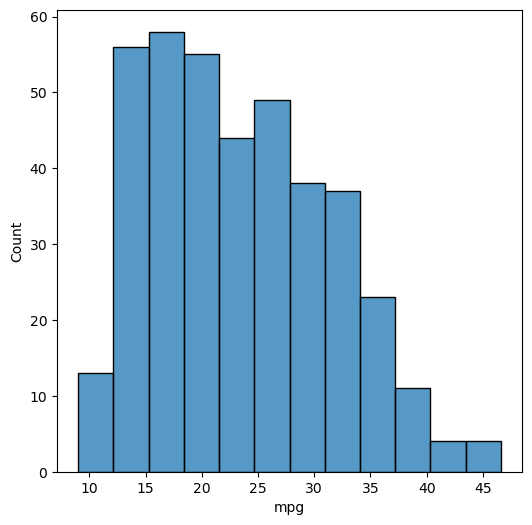

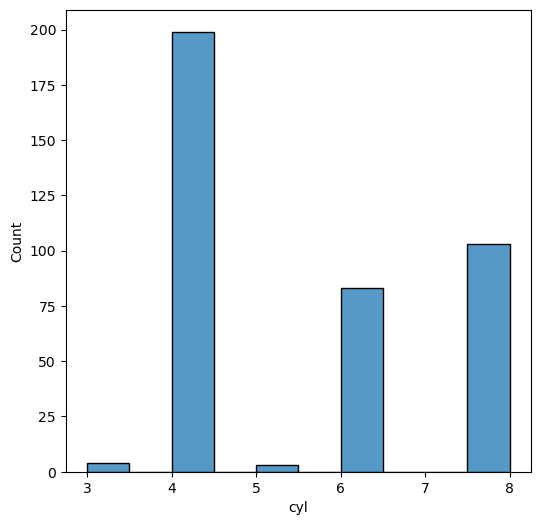

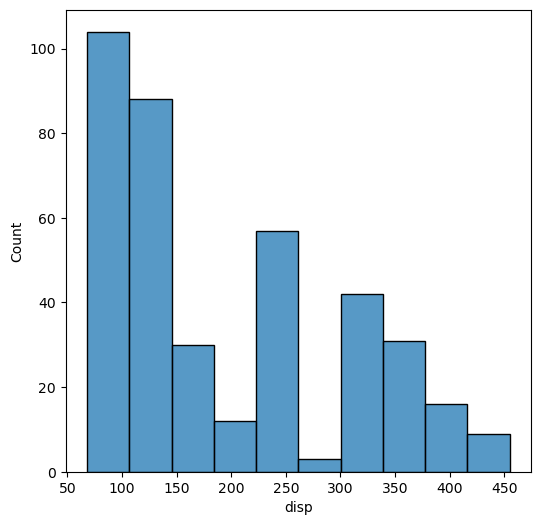

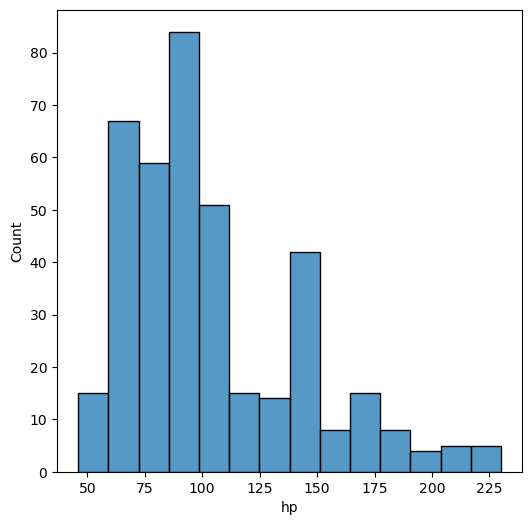

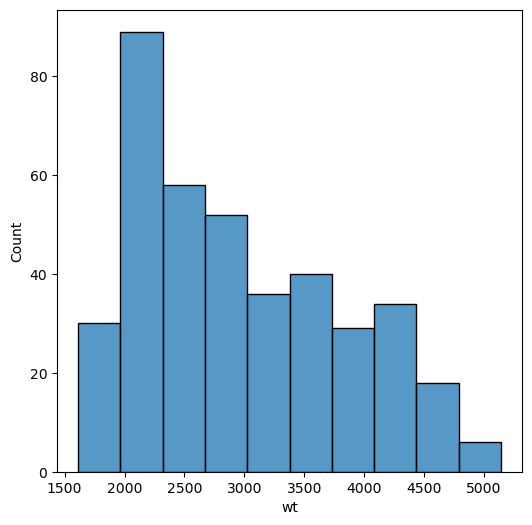

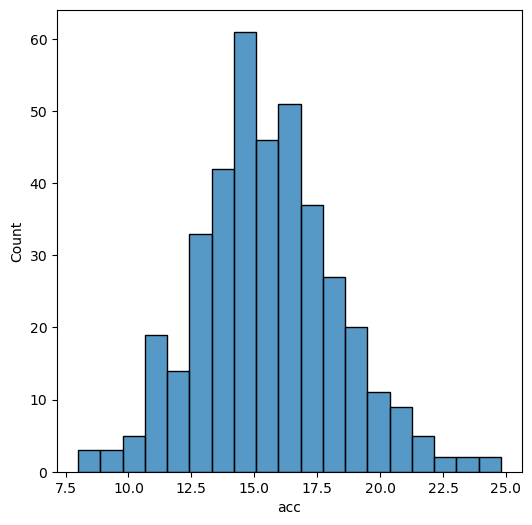

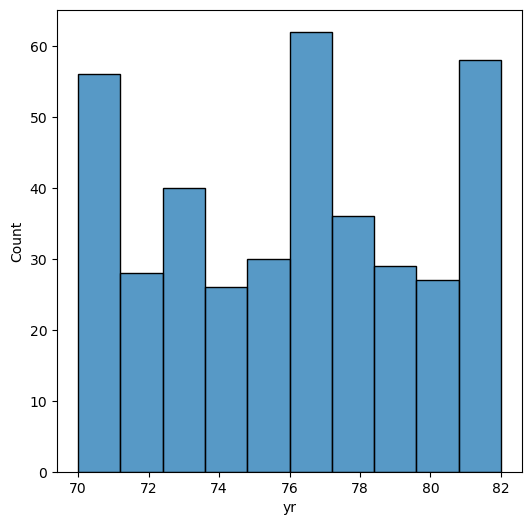

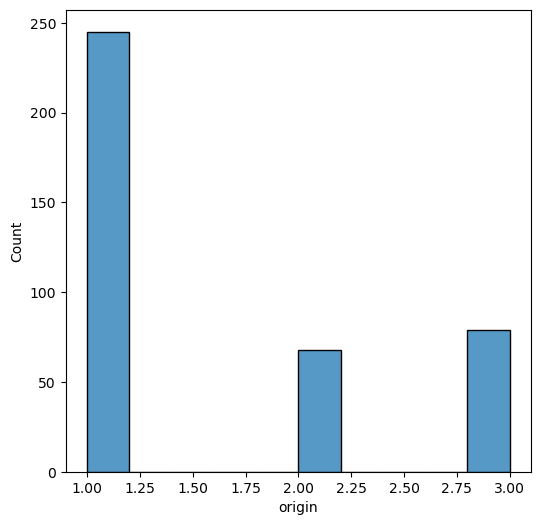

In [20]:
for i in cont_col:
    plt.figure(figsize =(6,6))
    sns.histplot(data = df,x=i)
    plt.show()

# **Outlier check**

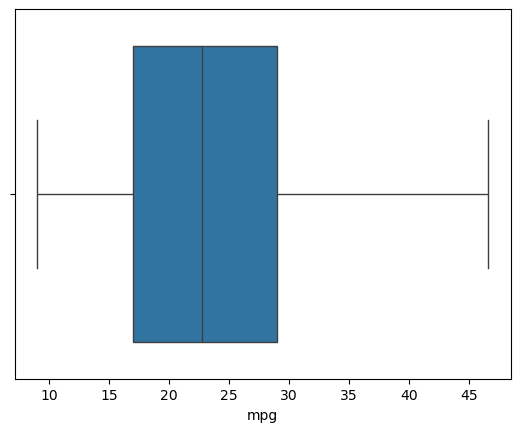

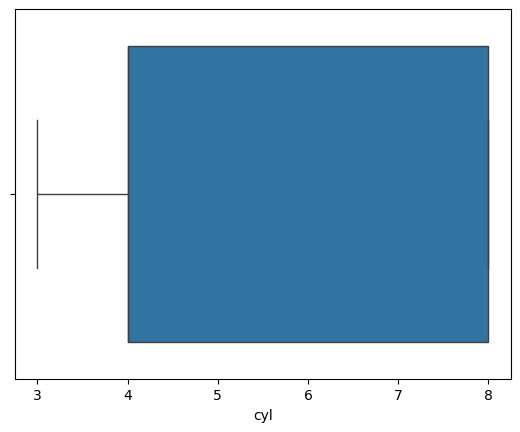

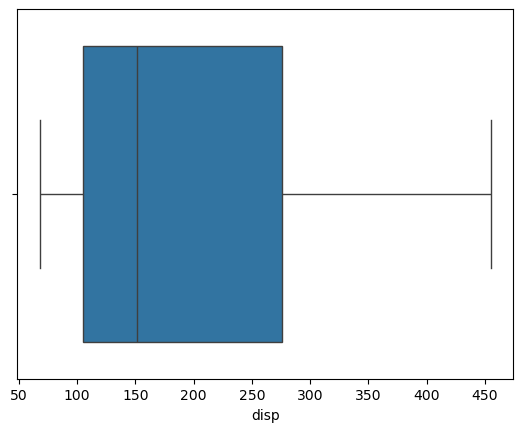

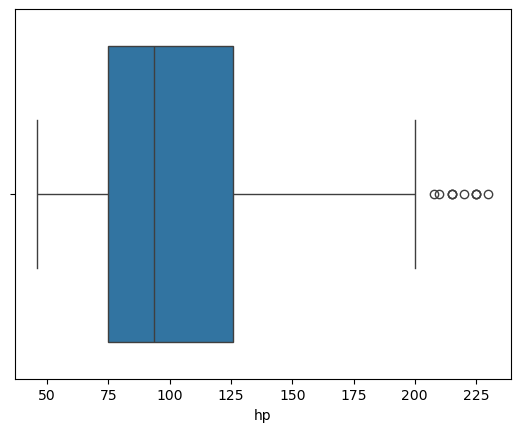

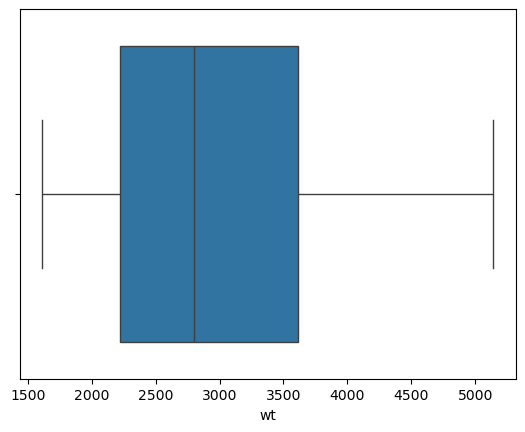

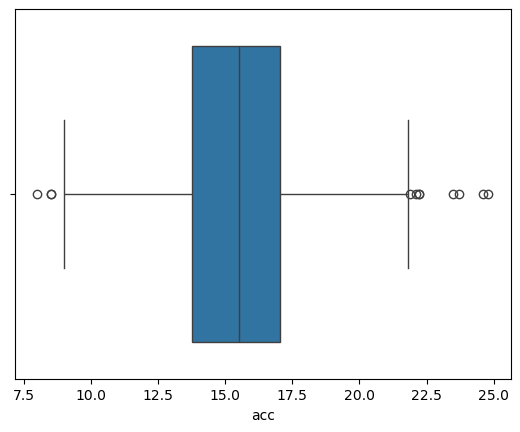

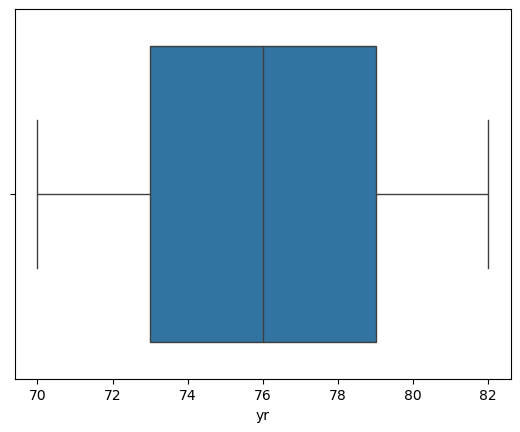

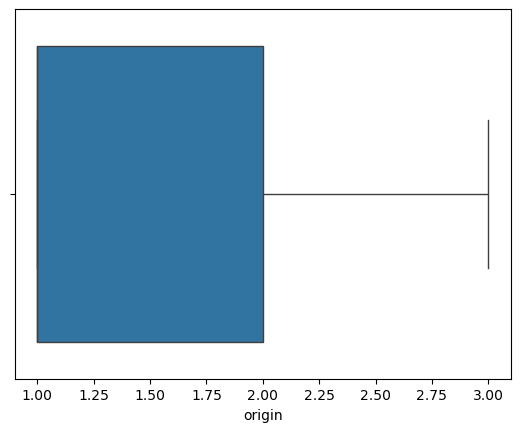

In [21]:
for i in cont_col:
    sns.boxplot(data=df,x = i)
    plt.show()

### Observation:
- Columns `acc`, and `hp` have visible outliers.
- - These will be capped using the IQR method to prevent model distortion.

# **Outlier Treatment**

In [22]:
for i in cont_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1 
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    df[i] = df[i].clip(lower = lower_limit,upper = upper_limit)

# **Again Checking ouliter treated or not**

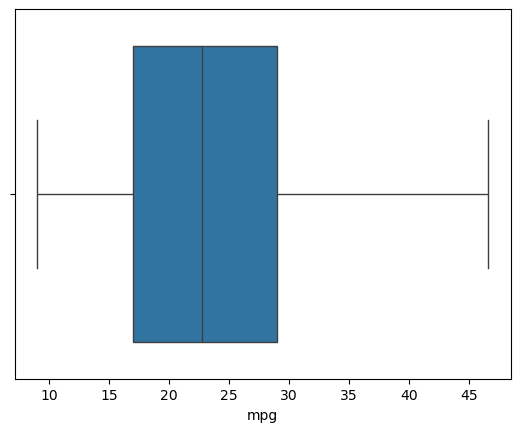

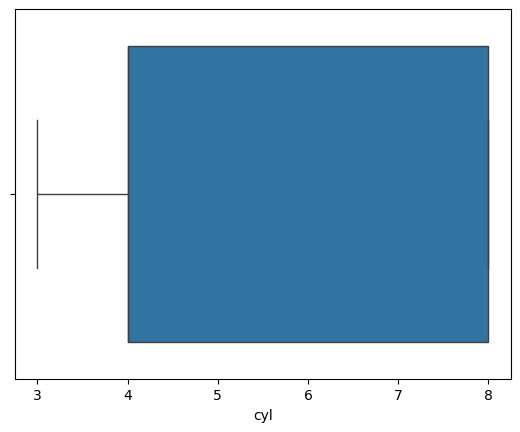

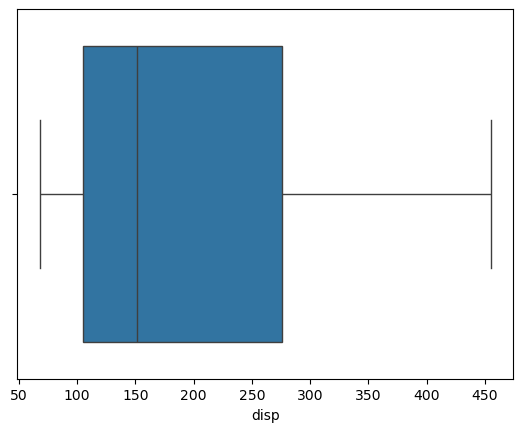

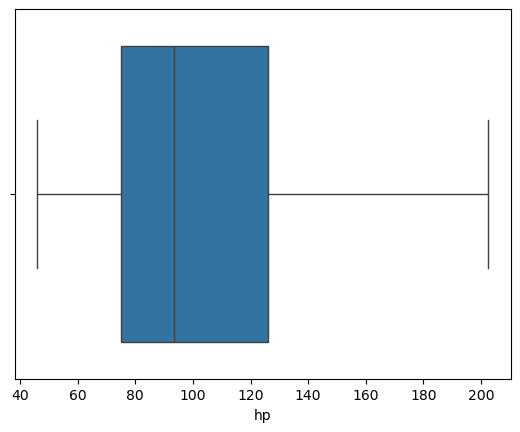

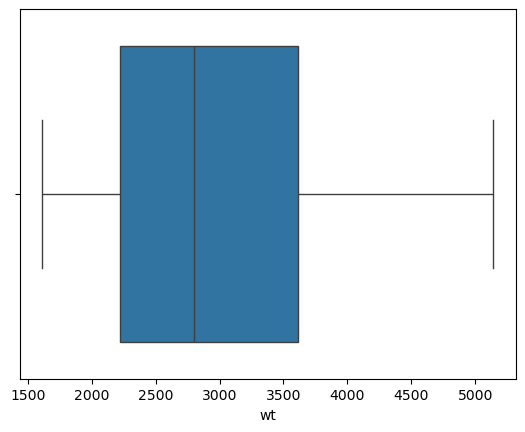

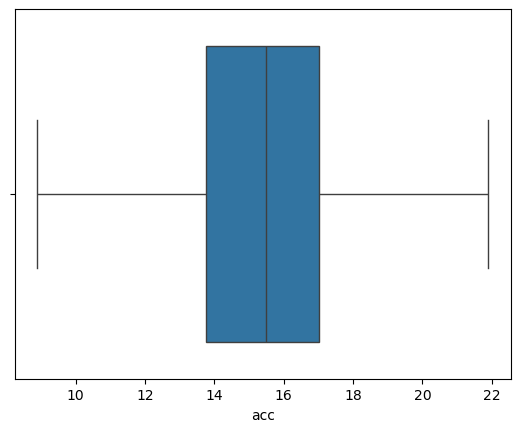

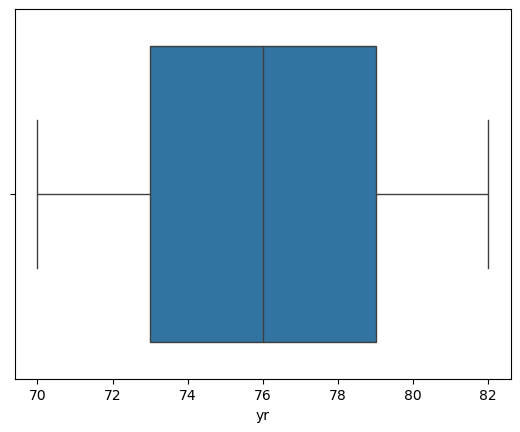

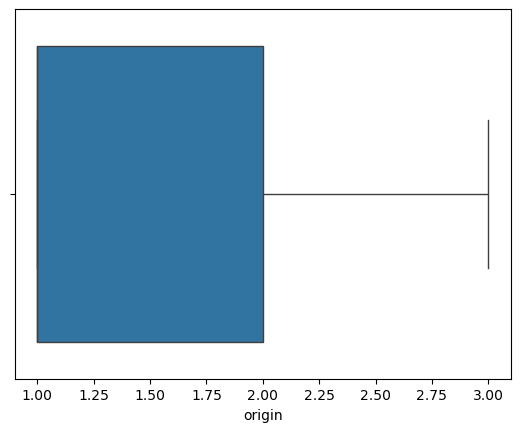

In [23]:
for i in cont_col:
    sns.boxplot(data=df,x = i)
    plt.show()

- Outliers removed.

# **Bivariate Analysis**

<Axes: >

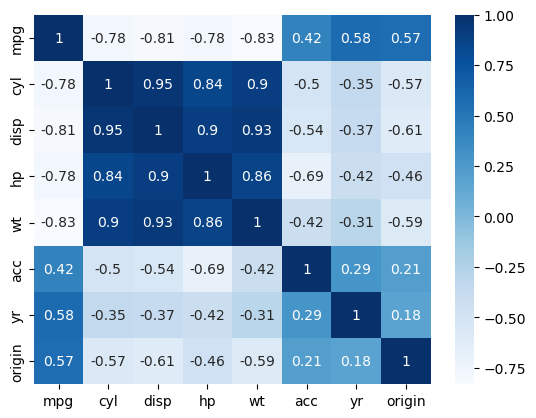

In [24]:
sns.heatmap(data=cont_col.corr(), annot=True, cmap='Blues')

### Observation:
- `yr` (model year) has strong positive correlation with `mpg`.
- `wt` and `hp` show strong **negative** correlation with `mpg`

# **Analyzing Relationships Between Features and Target (MPG)**

In [25]:
correlations = df.corr(numeric_only=True)['mpg'].sort_values(ascending=False).reset_index().rename(columns={'index': 'Feature', 'mpg': 'Correlation_with_MPG'})
correlations

,Feature,Correlation_with_MPG
0,mpg,1.000000
1,yr,0.580541
2,origin,0.565209
3,acc,0.421393
4,cyl,-0.777618
5,hp,-0.788856
6,disp,-0.805127
7,wt,-0.832244


# **Checking Multicoliniarity**

In [26]:
X_numeric = df.drop(columns=['mpg', 'car_name'])
X_const = add_constant(X_numeric)
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif = vif.iloc[1:].reset_index(drop=True)
vif

,Feature,VIF
0,cyl,10.612781
1,disp,21.095814
2,hp,11.150699
3,wt,11.696694
4,acc,2.857253
5,yr,1.252293
6,origin,1.763531


# **Scatter Plots: Relationship with MPG**

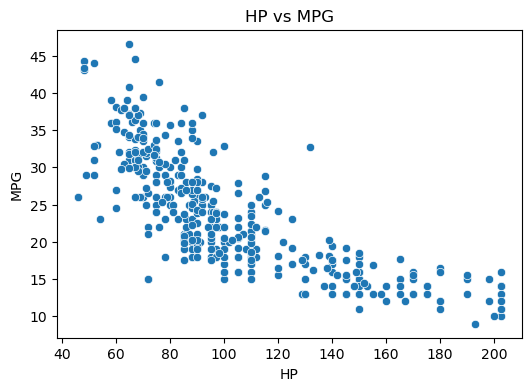

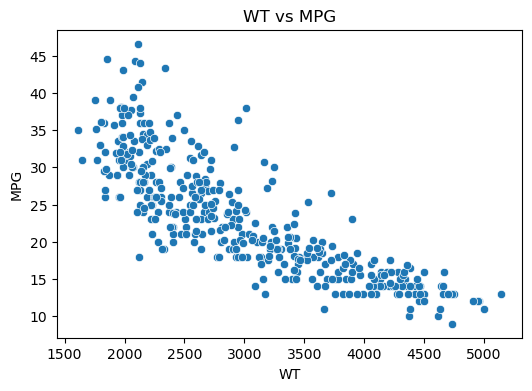

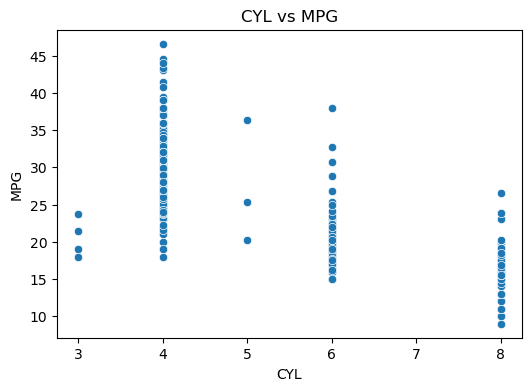

In [27]:
features = ['hp', 'wt', 'cyl']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='mpg', data=df)
    plt.title(f'{feature.upper()} vs MPG')
    plt.xlabel(feature.upper())
    plt.ylabel('MPG')
    plt.show()

# **Dropping Irrelevant Columns from Feature Set**

In [28]:
X = df.drop('car_name',axis = 1)
X

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,21.9,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


### **Observation:**
- `car_name` has too many unique values and doesn't contribute to prediction — will be dropped.

# **Defining Features (X) and Target Variable (y)**

In [29]:
X = X.drop(['mpg'],axis = 1)

In [30]:
X.head(3)

,cyl,disp,hp,wt,acc,yr,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1


In [31]:
y =df.mpg

In [32]:
y.head(3)

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

# **Encoding**

- We will skip encoding because there are no categorical columns here

# **Train Test Split**

In [33]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size =0.2, random_state = 5 )

# **Checking Shape of the split data**

In [34]:
Xtrain.shape

(313, 7)

In [35]:
Xtest.shape

(79, 7)

In [36]:
ytrain.shape

(313,)

In [37]:
ytest.shape

(79,)

# **Scaling**

In [38]:
num_col = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']

In [39]:
scaler = StandardScaler()

In [40]:
Xtrain[num_col] = scaler.fit_transform(Xtrain[num_col])
Xtest[num_col] = scaler.transform(Xtest[num_col])

# **Feature Selection**

### **Select K- Best**

In [41]:
skb = SelectKBest(score_func = f_regression, k = 'all')

In [42]:
skb.fit(Xtrain,ytrain)

SelectKBest(k='all', score_func=<function f_regression at 0x00000248951AA7A0>)

In [43]:
feature_scores=pd.DataFrame(data={'Feature':Xtrain.columns,'Score':skb.scores_})

In [44]:
feature_scores

,Feature,Score
0,cyl,490.187668
1,disp,562.472684
2,hp,499.870788
3,wt,729.589493
4,acc,63.675923
5,yr,166.893060
6,origin,161.814648


In [45]:
feature_scores = feature_scores.sort_values(by = 'Score',ascending = False).reset_index()

In [46]:
feature_scores.drop('index',axis = 1, inplace = True)

In [47]:
feature_scores

,Feature,Score
0,wt,729.589493
1,disp,562.472684
2,hp,499.870788
3,cyl,490.187668
4,yr,166.893060
5,origin,161.814648
6,acc,63.675923


# **RFE**

In [48]:
from sklearn.feature_selection import RFE

In [49]:
LR  = LinearRegression()

In [50]:
rfe = RFE(estimator=LR, n_features_to_select=5)

In [51]:
rfe.fit(Xtrain,ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [52]:
Ranking = rfe.ranking_

In [53]:
features = Xtrain.columns

In [54]:
rfe_rank = pd.DataFrame({'Feature': features, 'Ranking': Ranking})

In [55]:
rfe_rank.sort_values(by = 'Ranking')

,Feature,Ranking
1,disp,1
2,hp,1
3,wt,1
5,yr,1
6,origin,1
0,cyl,2
4,acc,3


### Observation:
- Top features include `wt`, `yr`, `acc`, and `origin` — selected for final model based on feature ranking.

In [56]:
comparison_df = vif.merge(rfe_rank, on='Feature')
comparison_df = comparison_df.merge(feature_scores, on='Feature')
comparison_df.rename(columns = {'VIF':'VIF','Ranking':'RFE','Score':'Select_K_Best'},inplace = True)
comparison_df = comparison_df.sort_values(by=['Select_K_Best', 'RFE', 'VIF'],ascending=[False, True, True]).reset_index().drop('index',axis = 1)
comparison_df

,Feature,VIF,RFE,Select_K_Best
0,wt,11.696694,1,729.589493
1,disp,21.095814,1,562.472684
2,hp,11.150699,1,499.870788
3,cyl,10.612781,2,490.187668
4,yr,1.252293,1,166.893060
5,origin,1.763531,1,161.814648
6,acc,2.857253,3,63.675923


# **Creating model with selected features**

In [57]:
Xtrain_fs = Xtrain[['origin','yr','wt','acc']]

In [58]:
Xtest_fs =  Xtest[['origin','yr','wt','acc']]

# **Modelling**

In [59]:
lr = LinearRegression()
model_1 = lr.fit(Xtrain_fs,ytrain)

### **Predictions on Training Data**

In [60]:
train_pred_1 = model_1.predict(Xtrain_fs)

### **Predictions on Test Data**

In [61]:
test_pred_1 = model_1.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Train Data)**

In [62]:
r2_train_lr = r2_score(ytrain,train_pred_1)
r2_train_lr

0.8216302286268368

### **R2 Score (Test Data)**

In [63]:
r2_test_lr = r2_score(ytest,test_pred_1)
r2_test_lr

0.7794160983654366

### **Mean Squared Error (Train Data)**

In [64]:
mse_train_lr = mean_squared_error(train_pred_1,ytrain)
mse_train_lr

9.945027986746057

### **Mean Squared Error (Test Data)**

In [65]:
mse_test_lr = mean_squared_error(test_pred_1,ytest)
mse_test_lr

16.398082128620356

### **Root Mean Squared Error (Train Data)**

In [66]:
rmse_train_lr = np.sqrt(mean_squared_error(train_pred_1,ytrain))
rmse_train_lr

3.1535738435537

### **Root Mean Squared Error (Test Data)**

In [67]:
rmse_test_lr = np.sqrt(mean_squared_error(test_pred_1,ytest))
rmse_test_lr

4.04945454704956

In [68]:
coef_lr = model_1.coef_
coef_lr

array([ 1.23349865,  2.54189169, -4.71596469,  0.2440382 ])

In [69]:
intercept_lr = model_1.intercept_
intercept_lr

20.942551650575645

# **Ridge Regression**

In [70]:
r = Ridge(alpha = 1)
model_2 = r.fit(Xtrain_fs,ytrain)

### **Prediction on Training Data**

In [71]:
train_pred_2  = model_2.predict(Xtrain_fs)

### **Prediction on Test Data**

In [72]:
test_pred_2 = model_2.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Training Data)**

In [73]:
r2_train_ridge = metrics.r2_score(ytrain,train_pred_2)
r2_train_ridge

0.8216247266909678

### **R2 Score (Test Data)**

In [74]:
r2_test_ridge  = metrics.r2_score(ytest,test_pred_2)
r2_test_ridge

0.7787273630671268

### **MSE (Training Data)**

In [75]:
mse_train_ridge = mean_squared_error(ytrain,train_pred_2)
mse_train_ridge

9.945334747840034

### **MSE (Test Data)**

In [76]:
mse_test_ridge = mean_squared_error(ytest,test_pred_2)
mse_test_ridge

16.449282320034477

### **RMSE (Training Data)**

In [77]:
rmse_train_ridge = np.sqrt(mean_squared_error(ytrain,train_pred_2))
rmse_train_ridge

3.153622480234442

### **RMSE (Test Data)**

In [78]:
rmse_test_ridge = np.sqrt(mean_squared_error(ytest,test_pred_2))
rmse_test_ridge

4.055771482718729

# **Lasso Regression**

In [79]:
l = Lasso(alpha = 1)
model_3 = l.fit(Xtrain_fs,ytrain)

### **Prediction on Training Data**

In [80]:
train_pred_3 = model_3.predict(Xtrain_fs)

### **Prediction on Test Data**

In [81]:
test_pred_3 = model_3.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Training Data)**

In [82]:
r2_train_lasso = metrics.r2_score(ytrain,train_pred_3)
r2_train_lasso

0.7828590635498927

### **R2 Score (Test Data)**

In [83]:
r2_test_lasso = metrics.r2_score(ytest,test_pred_3)
r2_test_lasso

0.7109442447384835

### **MSE (Training Data)**

In [84]:
mse_train_lasso = mean_squared_error(ytrain,train_pred_3)
mse_train_lasso

12.10671894368684

### **MSE (Test Data)**

In [85]:
mse_test_lasso = mean_squared_error(ytest,test_pred_3)
mse_test_lasso

21.48824088886288

### **RMSE (Training Data)**

In [86]:
rmse_train_lasso = np.sqrt(mean_squared_error(ytrain,train_pred_3))
rmse_train_lasso

3.479471072402649

### **RMSE (Test Data)**

In [87]:
rmse_test_lasso = np.sqrt(mean_squared_error(ytest,test_pred_3))
rmse_test_lasso

4.635541056755175

# **Elastic Net Regression**

In [88]:
en = ElasticNet(alpha=1,l1_ratio=0.5,random_state=42)
model_4 = en.fit(Xtrain_fs,ytrain)

### **Prediction on Training Data**

In [89]:
train_pred_4 = model_4.predict(Xtrain_fs)

### **Prediction on Test Data**

In [90]:
test_pred_4 = model_4.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Training Data)**

In [91]:
r2_train_en = metrics.r2_score(ytrain,train_pred_4)
r2_train_en

0.7397773844205507

### **R2 Score (Test Data)**

In [92]:
r2_test_en = metrics.r2_score(ytest,test_pred_4)
r2_test_en

0.6309031006433184

### **MSE (Training Data)**

In [93]:
mse_train_en = mean_squared_error(ytrain,train_pred_4)
mse_train_en

14.508743128384431

### **MSE (Test Data)**

In [94]:
mse_test_en = mean_squared_error(ytest,test_pred_4)
mse_test_en

27.438454140216447

### **RMSE (Training Data)**

In [95]:
rmse_train_en = np.sqrt(mean_squared_error(ytrain,train_pred_4))
rmse_train_en

3.8090344089262875

### **RMSE (Test Data)**

In [96]:
rmse_test_en = np.sqrt(mean_squared_error(ytest,test_pred_4))
rmse_test_en

5.238172786403332

# **Ridge Regression Tunning**

In [97]:
param_grid={'alpha':[0.01,0.1,10,100]}
grid=GridSearchCV(Ridge(),param_grid,cv=5, scoring='neg_root_mean_squared_error')
grid.fit(Xtrain_fs,ytrain)
print('Best_alpha:',grid.best_params_)
print('Best_rmse:',-grid.best_score_)

Best_alpha: {'alpha': 0.1}
Best_rmse: 3.2442397231886666


# **Lasso Regression Tunning**

In [98]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(Xtrain_fs, ytrain)

print("Best alpha:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

Best alpha: {'alpha': 0.01}
Best RMSE: 3.244228247564885


# **Elastic Regression Tunning**

In [99]:
param_grid = {'alpha': [0.01, 0.1, 1, 10],'l1_ratio': [0.1, 0.5, 0.9]}
grid = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(Xtrain_fs, ytrain)

print("Best Params:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

Best Params: {'alpha': 0.01, 'l1_ratio': 0.1}
Best RMSE: 3.243646432109408


# **Ridge Post Tunning**

In [100]:
rpt = Ridge(alpha = 0.01)
model_5= rpt.fit(Xtrain_fs,ytrain)

### **Prediction on Training Data**

In [101]:
train_pred_5 = model_5.predict(Xtrain_fs)

### **Prediction On Test Data**

In [102]:
test_pred_5 = model_5.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Train Data)**

In [103]:
r2_train_ridge_t = r2_score(ytrain,train_pred_5)
r2_train_ridge_t

0.8216302280701725

### **R2 Score (Test Data)**

In [104]:
r2_test_ridge_t = r2_score(ytest,test_pred_5)
r2_test_ridge_t

0.779409223276019

### **MSE (Training Data)**

In [105]:
mse_train_ridge_t = mean_squared_error(train_pred_5,ytrain)
mse_train_ridge_t

9.945028017782944

### **MSE (Test Data)**

In [106]:
mse_test_ridge_t = mean_squared_error(test_pred_5,ytest)
mse_test_ridge_t

16.39859321886799

### **RMSE (Training Data)**

In [107]:
rmse_train_ridge_t = np.sqrt(mean_squared_error(train_pred_5,ytrain))
rmse_train_ridge_t

3.153573848474607

### **RMSE (Test Data)**

In [108]:
rmse_test_ridge_t = np.sqrt(mean_squared_error(test_pred_5,ytest))
rmse_test_ridge_t

4.049517652618395

# **Lasso Post Tunning**

In [109]:
lpt = Lasso(alpha = 0.01)
model_6 = lpt.fit(Xtrain_fs,ytrain)

### **Prediction on Training Data**

In [110]:
train_pred_6 = model_6.predict(Xtrain_fs)

### **Prediction on Test Data**

In [111]:
test_pred_6 = model_6.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Training Data)**

In [112]:
r2_train_lasso_t = r2_score(ytrain,train_pred_6)
r2_train_lasso_t

0.821625836034142

### **R2 Score (Test Data)**

In [113]:
r2_test_lasso_t = r2_score(ytest,test_pred_6)
r2_test_lasso_t

0.7790146347043068

### **MSE (Training Data)**

In [114]:
mse_train_lasso_t = mean_squared_error(train_pred_6,ytrain)
mse_train_lasso_t

9.945272896278363

### **MSE (Test Data)**

In [115]:
mse_test_lasso_t = mean_squared_error(test_pred_6,ytest)
mse_test_lasso_t

16.42792670947181

### **RMSE (Training Data)**

In [116]:
rmse_train_lasso_t = np.sqrt(mean_squared_error(train_pred_6,ytrain))
rmse_train_lasso_t

3.153612673788327

### **RMSE (Test Data)**

In [117]:
rmse_test_lasso_t = np.sqrt(mean_squared_error(test_pred_6,ytest))
rmse_test_lasso_t

4.05313788433996

# **Elastic Net Post Tunning**

In [118]:
enpt= ElasticNet(alpha=0.01,l1_ratio=0.9,random_state=7)
model_7 = enpt.fit(Xtrain_fs, ytrain)

### **Prediction on Training Data**

In [119]:
train_pred_7 = model_7.predict(Xtrain_fs)

### **Prediction on Test Data**

In [120]:
test_pred_7 = model_7.predict(Xtest_fs)

# **Checking Performance**

### **R2 Score (Training Data)**

In [121]:
r2_train_en_t = r2_score(ytrain,train_pred_7)
r2_train_en_t

0.8216251891125655

### **R2 Score (Test Data)**

In [122]:
r2_test_en_t = r2_score(ytest,test_pred_7)
r2_test_en_t

0.778839070048003

### **MSE (Training Data)**

In [123]:
mse_train_en_t = mean_squared_error(ytrain,train_pred_7)
mse_train_en_t

9.945308965468412

### **MSE (Test Data)**

In [124]:
mse_test_en_t = mean_squared_error(ytest,test_pred_7)
mse_test_en_t

16.44097808643821

### **RMSE (Training Data)**

In [125]:
rmse_train_en_t = np.sqrt(mean_squared_error(ytrain,train_pred_7))
rmse_train_en_t

3.153618392492727

### **RMSE (Test Data)**

In [126]:
rmse_test_en_t = np.sqrt(mean_squared_error(ytest,test_pred_7))
rmse_test_en_t

4.0547475983639485

In [127]:
results = []

results.append(['Linear Regression', mse_train_lr, mse_test_lr, rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr])
results.append(['Ridge', mse_train_ridge, mse_test_ridge, rmse_train_ridge, rmse_test_ridge, r2_train_ridge, r2_test_ridge])
results.append(['Lasso', mse_train_lasso, mse_test_lasso, rmse_train_lasso, rmse_test_lasso, r2_train_lasso, r2_test_lasso])
results.append(['ElasticNet', mse_train_en, mse_test_en, rmse_train_en, rmse_test_en, r2_train_en, r2_test_en])
results.append(['Ridge (Tuned)', mse_train_ridge_t, mse_test_ridge_t, rmse_train_ridge_t, rmse_test_ridge_t, r2_train_ridge_t, r2_test_ridge_t])
results.append(['Lasso (Tuned)', mse_train_lasso_t, mse_test_lasso_t, rmse_train_lasso_t, rmse_test_lasso_t, r2_train_lasso_t, r2_test_lasso_t])
results.append(['ElasticNet (Tuned)', mse_train_en_t, mse_test_en_t, rmse_train_en_t, rmse_test_en_t, r2_train_en_t, r2_test_en_t])

columns = ['Model', 'Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train R²', 'Test R²']
results_df = pd.DataFrame(results, columns=columns)


In [128]:
results_df

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²
0,Linear Regression,9.945028,16.398082,3.153574,4.049455,0.821630,0.779416
1,Ridge,9.945335,16.449282,3.153622,4.055771,0.821625,0.778727
2,Lasso,12.106719,21.488241,3.479471,4.635541,0.782859,0.710944
3,ElasticNet,14.508743,27.438454,3.809034,5.238173,0.739777,0.630903
4,Ridge (Tuned),9.945028,16.398593,3.153574,4.049518,0.821630,0.779409
5,Lasso (Tuned),9.945273,16.427927,3.153613,4.053138,0.821626,0.779015
6,ElasticNet (Tuned),9.945309,16.440978,3.153618,4.054748,0.821625,0.778839


### **Conclusion:**
- Linear Regression gives the best performance with the lowest RMSE and highest R².
- Best suited for making accurate MPG predictions.